In [32]:
import math
import numpy as np
import pandas as pd
import scipy.optimize as optim
import matplotlib.pyplot as plt

In [33]:
# Import the data
data = pd.read_csv('C://Users//fiona//Documents//ita_cov.csv', sep=',')
data = data['cum_case']
data = data.reset_index(drop=False)
data.columns = ['Timestep', 'Total Cases']
data.head(10)

,Timestep,Total Cases
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,2


In [34]:
# Define funcion with the coefficients to estimate
def my_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))

In [35]:
# Randomly initialize the coefficients
p0 = np.random.exponential(size=3)
p0

array([1.76448889, 0.480696  , 0.07162458])

In [36]:
# Set min bound 0 on all coefficients, and set different max bounds for each coefficient
bounds = (0, [100000., 3., 1000000000.])

In [37]:
# Convert pd.Series to np.Array and use Scipy's curve fit to find the best Nonlinear Least Squares coefficients
x = np.array(data['Timestep']) + 1
y = np.array(data['Total Cases'])

(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)

In [38]:
# Show the coefficients
a,b,c

(1269.587822801152, 0.09857186112913618, 222121.84906563858)

In [39]:
# Redefine the function with the new a, b and c
def my_logistic(t):
    return c / (1 + a * np.exp(-b*t))

Text(0, 0.5, 'Infections')

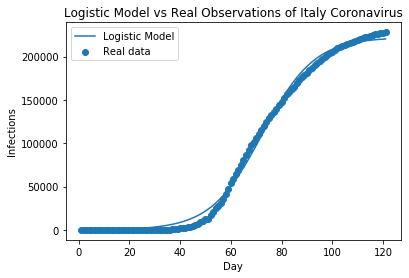

In [41]:
plt.scatter(x, y)
plt.plot(x, my_logistic(x))
plt.title('Logistic Model vs Real Observations of Italy Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Day')
plt.ylabel('Infections')

In [42]:
z = np.arange(365)+1

Text(0, 0.5, 'Infections')

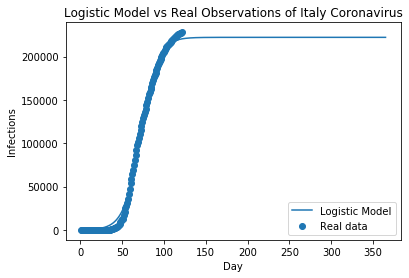

In [43]:
plt.scatter(x, y)
plt.plot(z, my_logistic(z))
plt.title('Logistic Model vs Real Observations of Italy Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Day')
plt.ylabel('Infections')